In [2]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [63]:
df = pd.read_csv("/Users/juhong/Library/CloudStorage/OneDrive-아주대학교/대학교/3학년 2학기/캡스톤/DUI-traffic-stop-recommendation/bar_list.csv",encoding="CP949")

In [64]:
df

,Unnamed: 0,지번주소,도로명주소,사업장명,위도,경도
0,0,서울특별시 강남구 신사동 525-13 지상1층101102호,서울특별시 강남구 압구정로4길 13-13 (신사동지상1층101102호),르포트 13,37.522346,127.018259
1,1,서울특별시 강남구 삼성동 150-21번지 지상1층,서울특별시 강남구 삼성로104길 7 (삼성동지상1층),한탕,37.510909,127.052322
2,2,서울특별시 강남구 논현동 242-21 삼아프라자,서울특별시 강남구 선릉로129길 3-6 삼아프라자 1층 101호 (논현동),묵호일식,37.515947,127.038082
3,3,서울특별시 강남구 청담동 95-15번지 지상2층,서울특별시 강남구 압구정로72길 22 지상2층 (청담동),볼트스테이크하우스(Vault steak house),37.525020,127.042083
4,4,서울특별시 강남구 역삼동 817-21 지상1층,서울특별시 강남구 강남대로96길 17 (역삼동지상1층),용용선생 강남역점,37.500139,127.025509
...,...,...,...,...,...,...
498,498,서울특별시 강남구 신사동 623-2번지,서울특별시 강남구 언주로 841 (신사동),산봉면옥,37.525560,127.030005
499,499,서울특별시 강남구 개포동 14-1번지 207-3호,서울특별시 강남구 개포로109길 34 (개포동207-3호),클린턴광장,37.494216,127.074727
500,500,서울특별시 강남구 논현동 240-4번지 지하1층,서울특별시 강남구 학동로 330 (논현동지하1층),리더스,37.516154,127.036136
501,501,서울특별시 강남구 논현동 234-1,서울특별시 강남구 논현로114길 8 지하1층 (논현동),갤럭시 펍,37.508518,127.031186


In [65]:
points = df[['위도','경도']]

In [66]:
points.head()

,위도,경도
0,37.522346,127.018259
1,37.510909,127.052322
2,37.515947,127.038082
3,37.525020,127.042083
4,37.500139,127.025509


In [67]:
points.columns = ["x","y"]

In [68]:
sns.set_palette("Set2")

<AxesSubplot:xlabel='x', ylabel='y'>

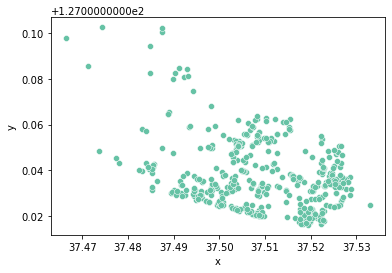

In [69]:
sns.scatterplot(x="x",y="y",data=points,palette="Set2")

In [70]:
#inf로 된 결측치 제거 3개
points.replace([np.inf],np.nan,inplace=True)

/var/folders/d2/20dks6yj46b_077x0h5fmr740000gn/T/ipykernel_1049/1620305212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points.replace([np.inf],np.nan,inplace=True)


In [71]:
points.dropna(subset=["x","y"],how="all",inplace = True)

/var/folders/d2/20dks6yj46b_077x0h5fmr740000gn/T/ipykernel_1049/292313200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points.dropna(subset=["x","y"],how="all",inplace = True)


In [72]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)

KMeans(n_clusters=5)

In [73]:
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

,x,y,cluster
0,37.522346,127.018259,1
1,37.510909,127.052322,2
2,37.515947,127.038082,0
3,37.525020,127.042083,0
4,37.500139,127.025509,4


<AxesSubplot:xlabel='x', ylabel='y'>

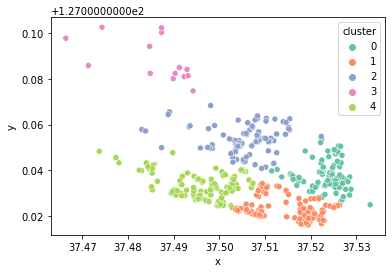

In [74]:
sns.scatterplot(x="x",y="y",hue="cluster",data=result_by_sklearn,palette="Set2")

In [77]:
#cluster의 center에서 가장 먼 거리에 있는 point뽑기
dist_points = kmeans.transform(points)

#모든 centroid부터의 거리가 주어지므로 가장 짧은 거리를 선택(자신이 속하는 cluster의 centroid와의 거리)
for i,dist in enumerate(dist_points):
    dist_points[i] = min(dist)

dist_points = dist_points[:,0]

#np array type의 distance를 pandas series로 변환
dist_points = pd.DataFrame(dist_points.transpose(),columns = ['dist'])
dist_points

,dist
0,0.008565
1,0.005396
2,0.007721
3,0.005482
4,0.008568
...,...
495,0.007082
496,0.015854
497,0.007437
498,0.010703


In [78]:
#결측치로 제거된 index를 고려하여 재배열
result_by_sklearn = result_by_sklearn.reset_index()

In [19]:
#각 좌표의 centroid 확인, pandas의 quicksort사용
type(result_by_sklearn)
result_by_sklearn = result_by_sklearn.sort_values(by = 'cluster')
result_by_sklearn

,x,y,cluster
302,37.528840,127.031764,0
436,37.528149,127.035159,0
435,37.526246,127.032617,0
102,37.526614,127.026518,0
240,37.512656,127.040442,0
...,...,...,...
174,37.524221,127.024444,4
386,37.506948,127.022180,4
387,37.508151,127.021273,4
167,37.526316,127.024870,4


In [20]:
kmeans.cluster_centers_

array([[ 37.52356065, 127.03679875],
       [ 37.49599688, 127.03300998],
       [ 37.50562917, 127.05343936],
       [ 37.48571869, 127.08811126],
       [ 37.51500808, 127.02267578]])

In [32]:
#points dataframe에 distance를 붙임
dist_points = pd.DataFrame(dist_points.transpose(),columns = ['dist'])
dist_points

,dist
0,0.008565
1,0.005396
2,0.007721
3,0.005482
4,0.008568
...,...
495,0.007082
496,0.015854
497,0.007437
498,0.010703


In [84]:
result_plus_dist = pd.concat([result_by_sklearn,dist_points],axis=1)
result_plus_dist = result_plus_dist[['x','y','cluster','dist']]
result_plus_dist

,x,y,cluster,dist
0,37.522346,127.018259,1,0.008565
1,37.510909,127.052322,2,0.005396
2,37.515947,127.038082,0,0.007721
3,37.525020,127.042083,0,0.005482
4,37.500139,127.025509,4,0.008568
...,...,...,...,...
495,37.525560,127.030005,0,0.007082
496,37.494216,127.074727,3,0.015854
497,37.516154,127.036136,0,0.007437
498,37.508518,127.031186,1,0.010703


In [85]:
#cluster를 기준으로 sorting
result_plus_dist = result_plus_dist.sort_values(by='cluster')
result_plus_dist

,x,y,cluster,dist
180,37.520407,127.033205,0,0.004781
311,37.526667,127.043337,0,0.007239
94,37.522415,127.039461,0,0.002899
93,37.523808,127.034791,0,0.002023
92,37.521920,127.039327,0,0.003014
...,...,...,...,...
148,37.502549,127.024671,4,0.010606
149,37.491334,127.035587,4,0.005328
150,37.485421,127.042170,4,0.013991
128,37.499251,127.033043,4,0.003254


In [86]:
kmeans.cluster_centers_

array([[ 37.52356065, 127.03679875],
       [ 37.51500808, 127.02267578],
       [ 37.50562917, 127.05343936],
       [ 37.48571869, 127.08811126],
       [ 37.49599688, 127.03300998]])